# Welcome to Jupyter!

In [1]:
# OBJECTIVE EDA
# Finding features of customer profiles that have a tendancy to churn
# Dataset taken after Shavie's dataset clean at commit e9d186a20fbf4ebf48f40e0eef0ca02c751f7d29

# Method
# Identify permutations of customer profiles from customers that churned only

# Findings
# The number of churns represents 26.5% of the whole dataset.
# 0.2% more male churns than female
# 64.2% of customers that churned have partners
# 82.6% of customers that churned have dependents
# Month-to-Month contract type has the majority churns by large margin
# 74.9% of the customers who churned used paperless billing
# 57.3% of customers that we on Electronic check payment method churned on high end vs. 12.4% paying by automatic credit card payment on low end

# General observations
# Males who have partners and dependents on a monthly contract paying via electronic check churned most frequently.

# Other comments
# Column names need to be cleaned here and there


In [2]:
import gc
import warnings
import numpy as np
import pandas as pd
# Sklearn imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
# Visualization
import matplotlib.pyplot as plt
#import seaborn as sns

In [4]:
# Import dataset
d = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Remove customer IDs from the data set
d = d.iloc[:,1:]

# Removing senior citizens from dataset aka COVID-19
# No seriously, mortality is an unintentional churn

d = d.drop(columns='SeniorCitizen')

d.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


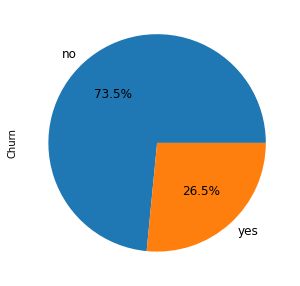

In [5]:
# Show the churn ratio for the whole dataset

ax = (d['Churn'].value_counts()*100.0 /len(d))\
.plot.pie(autopct='%.1f%%', labels = ['no', 'yes'],figsize =(5,5), fontsize = 12 )                                                                           


In [6]:
# Convert the predictor variable in a binary numeric variable

d['Churn'].replace(to_replace='Yes', value=1, inplace=True)
d['Churn'].replace(to_replace='No',  value=0, inplace=True)

d.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
# Reduce the dataset to customers that churned

churners = d['Churn'] == 1

churnset = d[churners]

churnset.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
8,Female,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Text(0, 0.5, 'Gender')

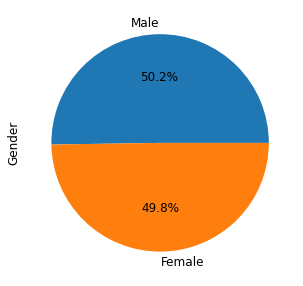

In [8]:
# Find the most dominant churned customer profile by gender

ax = (churnset['gender'].value_counts()*100.0 /len(d))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Gender',fontsize = 12)

Text(0, 0.5, 'Partner')

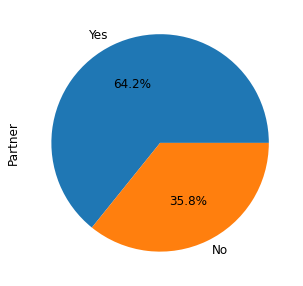

In [9]:
# Find the most dominant churned customer profile by partnered or not

ax = (churnset['Partner'].value_counts()*100.0 /len(d))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Partner',fontsize = 12)

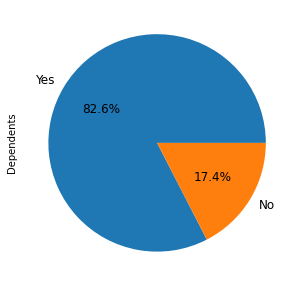

In [10]:
# Find the most dominant churned customer profile by whether they have dependents or not

ax = (churnset['Dependents'].value_counts()*100.0 /len(d))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )                                                                           

Text(0.5, 1.0, '# of Customers by Contract Type')

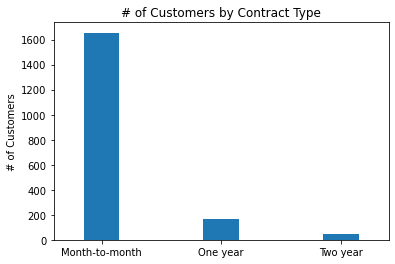

In [11]:
# Find the dominant contract that customers churned on

ax = churnset['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

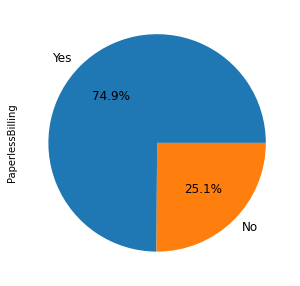

In [12]:
# Find the most dominant churned customer profile by paperless billing or not

ax = (churnset['PaperlessBilling'].value_counts()*100.0 /len(d))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )                                                                           


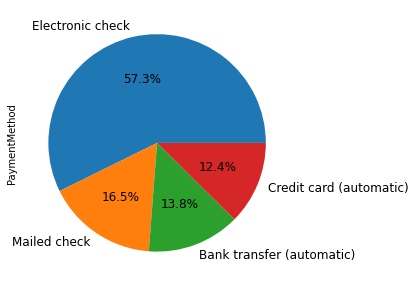

In [13]:
# Find the most dominant churned customer profile by payment method

ax = (churnset['PaymentMethod'].value_counts()*100.0 /len(d))\
.plot.pie(autopct='%.1f%%', labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],figsize =(5,5), fontsize = 12 )                                                                           
#ax.set_ylabel('PaymentMethod',fontsize = 12)

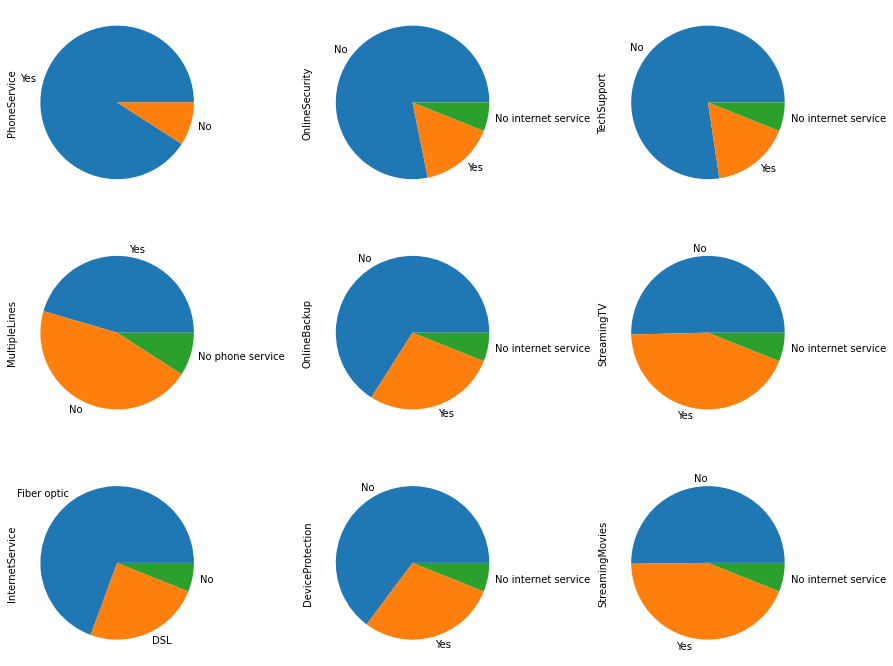

In [14]:
# What service types customers had when they churned

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = churnset[item].value_counts().plot(kind = 'pie',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = churnset[item].value_counts().plot(kind = 'pie',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = churnset[item].value_counts().plot(kind = 'pie',ax=axes[i-6,2],rot = 0)
    #ax.set_title(item)